   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


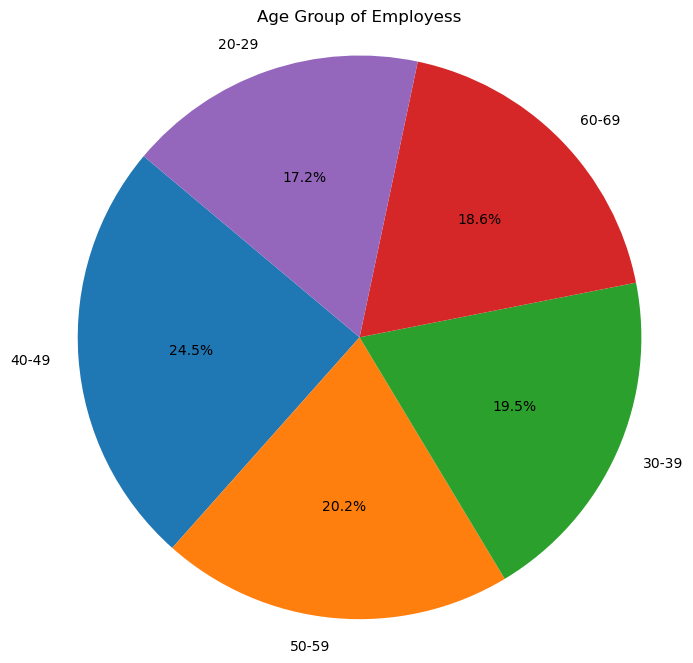

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from datetime import datetime

df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")

FILENAME = "people-1000.csv"
DATADIR = r"C:\Users\demac\OneDrive\Desktop\pands\PFDA-assignments\\"

file_path = os.path.join(DATADIR, "people-1000.csv")

print(df.head())

# Convert DOB to a date format (string to a int)
df['Date of birth'] = pd.to_datetime(df['Date of birth'])

# Get the actual date
today = datetime.today()

# Calculate age 
df['Year of Birth'] = df['Date of birth'].dt.year
df['Month of Birth'] = df['Date of birth'].dt.month
df['Day of Birth'] = df['Date of birth'].dt.day

df['Age'] = today.year - df['Year of Birth']

for i in range(len(df)):
    if(today.month, today.day) < (df.loc[i , 'Month of Birth'], df.loc[i, 'Day of Birth']):
        df.loc[i, 'Age'] -= 1

# Group the data by age ranges
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Counting the number of employees
age_group_count = df['Age Group'].value_counts()

# A pie chart for Age Group domain
plt.figure(figsize=(8, 8))
plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%', startangle=140)

# Ensure that pie chart is circular
plt.axis('equal')
# Set a title
plt.title('Age Group of Employess')
plt.show()
